In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv(r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\bitcoin_price_Training - Training.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

In [6]:
# Calculate daily percentage price changes manually with a for-loop
change_pct = [np.nan]

for i in range(1, len(df['Close'])):
    prev = df['Close'].iloc[i-1]
    cur = df['Close'].iloc[i]
    change_pct.append(100 * ((cur - prev) / prev))

# Store calculated daily returns as a new column
df['Close_price_pct'] = change_pct

df.dropna(inplace=True) # Remove first row

# Create histogram of daily returns to visualize overall distribution
fig_histo = go.Histogram(
    x=df['Close_price_pct'],
    nbinsx=100, # Number of bin
    name='Daily Return Distribution',
    marker=dict(
        line=dict(
            color='black',
            width=1
        )
    )
)

# Create boxplot of daily returns per year to compare volatility across time
fig_boxplot = go.Box(
    x=df.index.strftime('%Y'),
    y=df['Close_price_pct'],
    boxmean='sd'    # add standard deviation line
)

# Create a subplot layout
fig = make_subplots(
    rows=2, cols=1,
    shared_xaxes=False,
    subplot_titles=('Distribution of Daily Returns from 2013 to 2017', 'Yearly Volatility Comparison of Daily Returns')
)

# Create a subplot layout
fig.add_trace(fig_histo, row=1, col=1)
fig.add_trace(fig_boxplot, row=2, col=1)

fig.update_layout(
    height=800,
    showlegend=False,
    title='Bitcoin Price Dynamics: Long-Term Trends and Short-Term Volatility (2013–2017)',
    template='plotly_white'
)

# Add axis labels to histogram
fig.update_xaxes(title_text='Daily Return (%)', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=1)

# Add axis labels to boxplot
fig.update_xaxes(title_text='Year', row=2, col=1)
fig.update_yaxes(
    title_text='Daily Return (%)',
    range=[-20, 20],    # set the y-axis values
    row=2, col=1
)

fig.show()

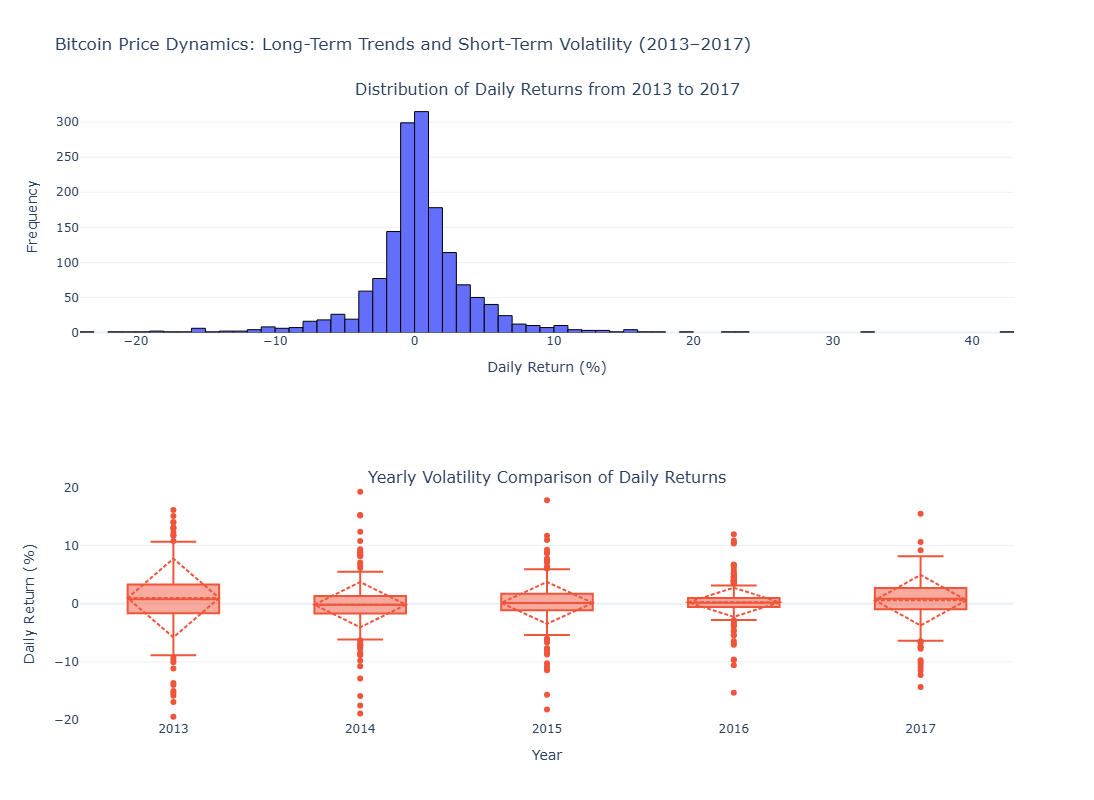

In [7]:
# Display the saved plot as a static image as Plotly interactive charts cannot be rendered directly on GitHub

from IPython.display import Image

Image(
    filename=r'D:\Data Analyst stuffs\Python stuffs\Learn Python for Data Analysis\PYTHON_EXERCISES_UDEMY\Bitcoin Case Study\Own_Exercises\Volatility_Analysis.png'
) 